### Clean needed data and save in seprate files

In [13]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import tqdm
import requests
import json

In [2]:
citation_df=pd.read_csv('papers.csv')

In [3]:
citation_df.columns
citation_df_mod=pd.DataFrame(columns=citation_df.columns)

In [5]:
# combine paper with same title into one row
i=0
while i<len(citation_df):
    title=citation_df.loc[i,'Title']
    ct=i
    conf=citation_df.loc[i,'Conference']
    year=citation_df.loc[i,'Year']
    authors=[]
    aff=[]
    while ct<len(citation_df) and citation_df.loc[ct,'Title']==title:
        authors.append(citation_df.loc[ct,'Author'])
        aff.append(citation_df.loc[ct,'Affiliation'])
        i=i+1
        ct=ct+1
    citation_df_mod.loc[len(citation_df_mod)]=[conf,year,title,authors,aff]
    
   




In [6]:
citation_df_mod.to_csv('papers_mod.csv',index=False)

In [7]:
citation_df_mod=pd.read_csv('papers_mod.csv')

In [8]:
citation_df_mod

,Conference,Year,Title,Author,Affiliation
0,NeurIPS,2006,Attentional Processing on a Spike-Based VLSI N...,"['Yingxue Wang', 'Rodney J Douglas', 'Shih-Chi...","['Swiss Federal Institute of Technology, Zuric..."
1,NeurIPS,2006,Multi-Task Feature Learning,"['Andreas Argyriou', 'Theos Evgeniou', 'Massim...","['Ecole Centrale de Paris', 'INSEAD', 'IIT & U..."
2,NeurIPS,2006,A Rate-Distortion Approach to Joint Pattern Al...,['Andrea Vedaldi'],['Facebook AI Research and University of Oxford']
3,NeurIPS,2006,Context Effects in Category Learning: An Inve...,"['Mike Mozer', 'Michael Jones', 'Michael Shett...","['Google Research and U. Colorado Boulder', 'I..."
4,NeurIPS,2006,Comparative Gene Prediction using Conditional ...,"['Jade P Vinson', 'David DeCaprio', 'Stacey Lu...","['Renaissance Technologies', 'None', 'None', '..."
...,...,...,...,...,...
13258,ICLR,2021,Stochastic Security: Adversarial Defense Using...,"['Mitch Hill', 'Jonathan Mitchell', 'Song-Chun...","['University of Central Florida', 'University ..."
13259,ICLR,2021,Factorizing Declarative and Procedural Knowled...,"['Anirudh Goyal', 'Alex Lamb', 'Phanideep Gamp...","['MILA, University of Montreal', 'University o..."
13260,ICLR,2021,Non-asymptotic Confidence Intervals of Off-pol...,"['Yihao Feng', 'Ziyang Tang', 'Na Zhang', 'Qia...","['The University of Texas at Austin', 'Univers..."
13261,ICLR,2021,Combining Label Propagation and Simple Models ...,"['Qian Huang', 'Horace He', 'Abhay Singh', 'Se...","['Cornell University', 'Facebook', 'Cornell Un..."


In [35]:
# getting paper id using title 
citation_df_mod['Paper_ID']=np.nan
citation_df_mod['Cited_Papers']=[[] for i in range(len(citation_df_mod))]

In [41]:
# number of papers before 2015
len(citation_df_mod[citation_df_mod['Year']<2010])

933

In [43]:
# error rate
error_rate=0
number_of_papers=len(citation_df_mod[citation_df_mod['Year']<2010])
for i in tqdm.trange(number_of_papers):
    title=citation_df_mod.loc[i,'Title']
    try:
        query="http://api.semanticscholar.org/graph/v1/paper/search?query="+title
        req=requests.get(query)
        response=req.json()
        id=response['data'][0]['paperId']
        citation_df_mod.loc[i,'Paper_ID']=id
        search_by_id="https://api.semanticscholar.org/graph/v1/paper/"+id+"?fields=title,citations.authors,authors"
        req=requests.get(search_by_id)
        cited_paper=[]
        
        response=dic2=json.loads(req.content.decode('utf-8'))
        
        for citation in response['citations']:
            cited_paper.append(citation['paperId'])
            citation_df_mod.loc[i,'Cited_Papers'].append(citation['paperId'])
       
        
       
    except Exception as e:
       
        error_rate=error_rate+1
    

error_rate

100%|██████████| 933/933 [1:58:54<00:00,  7.65s/it]  


116

In [44]:
citation_df_mod.head()


,Conference,Year,Title,Author,Affiliation,Paper_ID,Cited_Papers
0,NeurIPS,2006,Attentional Processing on a Spike-Based VLSI N...,"['Yingxue Wang', 'Rodney J Douglas', 'Shih-Chi...","['Swiss Federal Institute of Technology, Zuric...",NaN,[]
1,NeurIPS,2006,Multi-Task Feature Learning,"['Andreas Argyriou', 'Theos Evgeniou', 'Massim...","['Ecole Centrale de Paris', 'INSEAD', 'IIT & U...",1cac3ee85e52cb0afde71f66472e35a315a4a112,"[ad82862b99028bf87eda454bf0f92788f19cdbac, 489..."
2,NeurIPS,2006,A Rate-Distortion Approach to Joint Pattern Al...,['Andrea Vedaldi'],['Facebook AI Research and University of Oxford'],NaN,[]
3,NeurIPS,2006,Context Effects in Category Learning: An Inve...,"['Mike Mozer', 'Michael Jones', 'Michael Shett...","['Google Research and U. Colorado Boulder', 'I...",7227f224679969446d5363c7dbfd61bcdd4b338f,"[c5c744b1609f473c882bcbd751eb13a72f13e7bc, f5a..."
4,NeurIPS,2006,Comparative Gene Prediction using Conditional ...,"['Jade P Vinson', 'David DeCaprio', 'Stacey Lu...","['Renaissance Technologies', 'None', 'None', '...",167126a5c592ea0ac743228c5465b45eed3f0e84,"[784355019ffeec8bd01557fce49891bcf697e57c, 7a1..."


In [45]:
citation_df_mod.to_csv('citations.csv',index=False)

In [76]:
# creating citation graph
class node():
    id : str
    cited_by : list
    def __init__(self,id):
        self.id=id
        self.cited_by=[]
    def add_citation(self,citation):
        self.cited_by.append(citation)
    
    def get_cited_by(self):
        return self.cited_by

class Graph:
    nodes: dict
    def __init__(self):
        self.nodes={}
    
    def add_node(self,node):
        self.nodes[node.id]=node
    
    def get_node(self,id):
        return self.nodes.get(id)
graph=Graph()
for i in range(933):
    if(type(citation_df_mod.loc[i,'Paper_ID'])!=str):
        continue
    graph.add_node(node(citation_df_mod.loc[i,'Paper_ID']))

for i in range(len(citation_df_mod)):
    for cited_paper in citation_df_mod.loc[i,'Cited_Papers']:
        if(graph.get_node(cited_paper)!=None):
            graph.get_node(cited_paper).add_citation(citation_df_mod.loc[i,'Paper_ID'])





In [77]:
graph.nodes

{'1cac3ee85e52cb0afde71f66472e35a315a4a112': <__main__.node at 0x1fd76c08cd0>,
 '7227f224679969446d5363c7dbfd61bcdd4b338f': <__main__.node at 0x1fd76c094d0>,
 '167126a5c592ea0ac743228c5465b45eed3f0e84': <__main__.node at 0x1fd76c09610>,
 '219a1eed0d61a144024a6d1cf487c116d1cfd017': <__main__.node at 0x1fd76c0b690>,
 'dc08a44d88826a80472c374a287a78376a167fd0': <__main__.node at 0x1fd76c09110>,
 '2ca59d9e88682a56b6f8fc748d3186d089749bf2': <__main__.node at 0x1fd76c0b790>,
 '67f37538c732eb1d9f4d5f47816b5e210085ae8f': <__main__.node at 0x1fd76c0b090>,
 '600f5d8df92b6cc7f4b800fabe47f66eb7fb9acd': <__main__.node at 0x1fd76c0b390>,
 '401f2075dd1963c522fb36f5a84a4ad12d73637e': <__main__.node at 0x1fd76c0a410>,
 'b672b3ee71b78050bdde8b4a4cecbb653a822b5d': <__main__.node at 0x1fd76c0b890>,
 'e75591901afd4a1868ff2e0a1e161592102ccff1': <__main__.node at 0x1fd76c0acd0>,
 '573ba91771eda7177015e5597126f881bf88f9a3': <__main__.node at 0x1fd76c09290>,
 'ba3ad95a489a0c7345456716e297d63c36181d5a': <__main

In [78]:
# most cited paper
max_citation=0
max_citation_paper=None
for node in graph.nodes.values():
    if len(node.get_cited_by())>max_citation:
        max_citation=len(node.get_cited_by())
        max_citation_paper=node.id
print(max_citation_paper,max_citation)
print(citation_df_mod[citation_df_mod['Paper_ID']==max_citation_paper]['Title'].values[0])

1a0a3eac29839894ea07cc3b1c2a3b2a0c63c3f7 5
Dual Averaging Method for Regularized Stochastic Learning and Online Optimization


In [79]:
# average citation
total_citation=0
for node in graph.nodes.values():
    total_citation=total_citation+len(node.get_cited_by())
print(total_citation/len(graph.nodes))
print(len(graph.nodes))


0.3780193236714976
828


In [80]:
# top 10 most cited paper
citation_count={}
for node in graph.nodes.values():
    citation_count[node.id]=len(node.get_cited_by())
sorted_citation_count=sorted(citation_count.items(), key=lambda x: x[1], reverse=True)
sorted_citation_count[:10]


[('1a0a3eac29839894ea07cc3b1c2a3b2a0c63c3f7', 5),
 ('2f14e3b459dc78868851c372ae00a74519c3e1f4', 4),
 ('8e20c700d413278e06affa930e21e1aa04f27aca', 4),
 ('5c5060e4e0aa92357f78c03d43da577e7173677a', 4),
 ('2f5521885acca3905a83c953e7a2f78ec39e218e', 4),
 ('42ea66546091e5b0c47f74e6063ff7d940990681', 4),
 ('aa1fa18231b8c6b35a21796af446899fc681a107', 4),
 ('803370480d83e884ae54b4793c2d518c9fed05a2', 4),
 ('c19e0059b05ca134c8dbe29e73961bce860e6a88', 3),
 ('457628a1c232bb48acc2db8440571e289cc80e15', 3)]

In [81]:
# distribution of citation
citation_distribution={}
for node in graph.nodes.values():
    citation_distribution[len(node.get_cited_by())]=citation_distribution.get(len(node.get_cited_by()),0)+1
sorted_citation_distribution=sorted(citation_distribution.items(), key=lambda x: x[0], reverse=False)
sorted_citation_distribution


[(0, 597), (1, 177), (2, 35), (3, 11), (4, 7), (5, 1)]

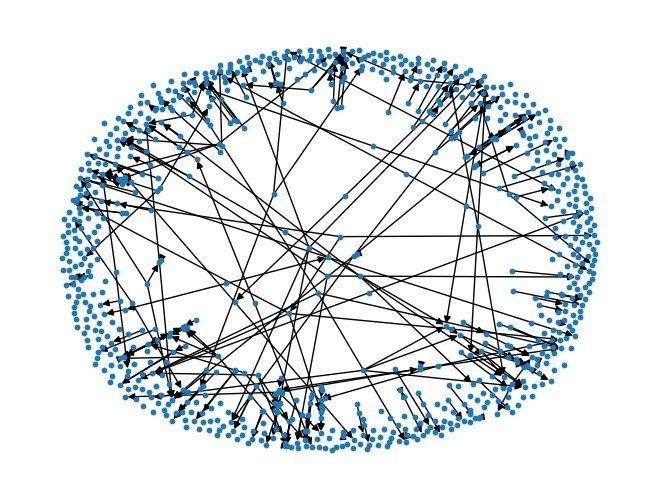

In [82]:
# create visual graph
import networkx as nx
G=nx.DiGraph()
for node in graph.nodes.values():
    G.add_node(node.id)
    for cited_paper in node.get_cited_by():
        G.add_edge(node.id,cited_paper)
nx.draw(G,with_labels=False,node_size=10)
plt.show()


Text(0.5, 0, 'Number of citation')

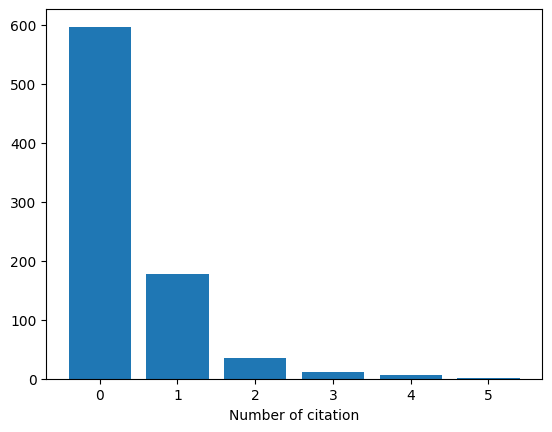

In [83]:
# distribution graph of citation
plt.bar([i[0] for i in sorted_citation_distribution],[i[1] for i in sorted_citation_distribution])
plt.xlabel('Number of citation')